## 数据导入

In [1]:
import pandas as pd
def read_xlsx(address, symbol, year):
    data = pd.read_excel(address, dtype={symbol: str})
    data.columns = data.columns.str.strip()   # 删除空格
    data[symbol] = data[symbol].astype(str).str.extract(r'(\d+)')   # 删除标点和英文字符
    data[symbol] = data[symbol].astype(str).str.zfill(6)    # 规范股票代码格式
    data = data.rename(columns={symbol: '股票代码'})
    # 如果year非空
    if year:
        data = data.rename(columns={year: '年份'})
    print("形状：", data.shape)
    print("列名：", data.columns)
    print("包含公司数量：", len(data['股票代码'].unique()))
    return data

In [2]:
regress_address = r'E:\ggq的文件\比赛\24统计建模\regress\e实证数据_筛选1994家企业_29489条数据_哑变量_工具变量_劳动力.xlsx'
df = read_xlsx(regress_address, '股票代码', '年份')
df['AI'] = df['AI'] / 100

形状： (29489, 70)
列名： Index(['股票代码', '年份', 'A股简称', 'A股上市日期', '省份', '城市', '所属行业', '板块', 'GTFP',
       'AIDIC', 'AIDIC_累加后log', 'AIGPT', 'AI', 'East', 'West', 'Mid', 'LnCit1',
       'LnCit2', 'GreenInnov', 'grd', 'gcon', 'IIP', 'OIP', 'Size', 'Lev',
       'Cashflow', 'FIXED', 'Growth', 'Board', 'Dual', 'Top1', 'TobinQ',
       'FirmAge', 'Employee', 'REC', 'INV', 'Intangible', 'AssetGrowth',
       'NetProfitGrowth', 'ITR', 'CAP', 'Invest1', 'Indep', 'Balance1',
       'Seperate', 'BM', 'PB', 'Ofee', 'Mfee', 'ATO', 'SA', 'WW', 'FC', 'KZ',
       'HighTech_1', 'HighTech_2', 'HighTech_3', 'HighTech_4', 'HighTech_5',
       'Pollute_1', 'Pollute_2', 'Pollute_3', 'SOE', 'Loss', '市场分割指数均值切分',
       '市场一体化指数均值切分', '人均gdp均值切分', '人工智能政策受益', '常规低技能劳动力占比', '非常规高技能劳动力占比'],
      dtype='object')
包含公司数量： 1994


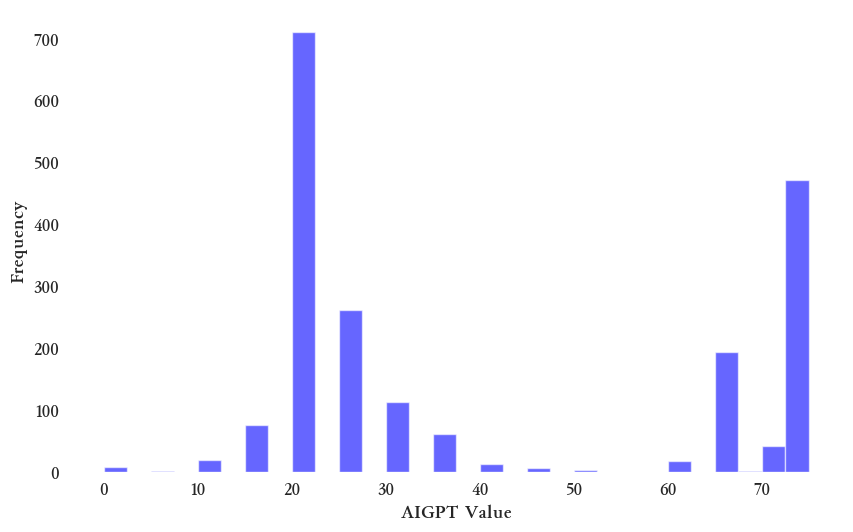

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.font_manager import FontProperties

# 字体路径和字体属性设置
font_path = 'C:/Users/25105/AppData/Local/Microsoft/Windows/Fonts/FZCuJinLJW.TTF'
ax_font = FontProperties(fname=font_path, size=14)  # 轴标签字体
tick_font = FontProperties(fname=font_path, size=12)  # 刻度标签字体

plot_df = df[df['年份'] == 2022]

# 创建图表
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.set_facecolor('white')  # 设置背景颜色为白色
ax.grid(False)  # 关闭网格线

# 绘制柱状图
plot_df ['AIGPT'].plot(kind='hist', bins=30, color='blue', alpha=0.6, ax=ax)

# 设置标题和标签
plt.xlabel('AIGPT Value', fontproperties=ax_font)
plt.ylabel('Frequency', fontproperties=ax_font)

# 设置刻度标签字体
plt.xticks(fontproperties=tick_font)
plt.yticks(fontproperties=tick_font)
plt.savefig('E:/ggq的文件/比赛/24统计建模/paper/fig/hist.png', dpi=300)
plt.show()

In [3]:
# 'AI'列描述性统计
print(df['AI'].describe())

count    29489.000000
mean         0.134821
std          0.215406
min          0.000000
25%          0.000000
50%          0.000000
75%          0.200000
max          0.750000
Name: AI, dtype: float64


In [4]:
print(df['GTFP'].describe())

count    29489.000000
mean         0.929006
std          0.210710
min          0.000000
25%          0.856460
50%          0.960717
75%          1.059999
max          1.166402
Name: GTFP, dtype: float64


## 3D柱状图

In [5]:
import matplotlib.pyplot as plt
print(plt.colormaps())

['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'turbo', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'grey', 'gist_grey', 'gist_yerg', 'Grays', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'turbo_r', 'Blues_r', 'BrBG_r', '

In [6]:
print(df['省份'].unique())

['广东省' '北京市' '吉林省' '江苏省' '辽宁省' '安徽省' '四川省' '湖南省' '新疆维吾尔自治区' '山东省' '河南省'
 '河北省' '江西省' '山西省' '青海省' '浙江省' '湖北省' '内蒙古自治区' '海南省' '重庆市' '陕西省' '福建省'
 '广西壮族自治区' '天津市' '云南省' '甘肃省' '宁夏回族自治区' '贵州省' '上海市' '西藏自治区' '黑龙江省']


In [7]:
# 映射字典
province_map = {
    '山东省': '鲁', '北京市': '京', '广东省': '粤', '重庆市': '渝', '上海市': '沪',
    '安徽省': '皖', '河南省': '豫', '湖南省': '湘', '湖北省': '鄂', '四川省': '川',
    '甘肃省': '甘', '辽宁省': '辽', '天津市': '津', '浙江省': '浙', '黑龙江省': '黑',
    '内蒙古自治区': '蒙', '福建省': '闽', '江西省': '赣', '山西省': '晋', '海南省': '琼',
    '江苏省': '苏', '陕西省': '陕', '新疆维吾尔自治区': '新', '河北省': '冀', '云南省': '云',
    '吉林省': '吉', '西藏自治区': '藏', '贵州省': '黔', '广西壮族自治区': '桂', '青海省': '青',
    '宁夏回族自治区': '宁'
}
df['省份简称'] = df['省份'].map(province_map)
print(df['省份简称'].unique())

['粤' '京' '吉' '苏' '辽' '皖' '川' '湘' '新' '鲁' '豫' '冀' '赣' '晋' '青' '浙' '鄂' '蒙'
 '琼' '渝' '陕' '闽' '桂' '津' '云' '甘' '宁' '黔' '沪' '藏' '黑']


In [9]:
# 保留四位小数
df['AI'] = df['AI'].round(4)

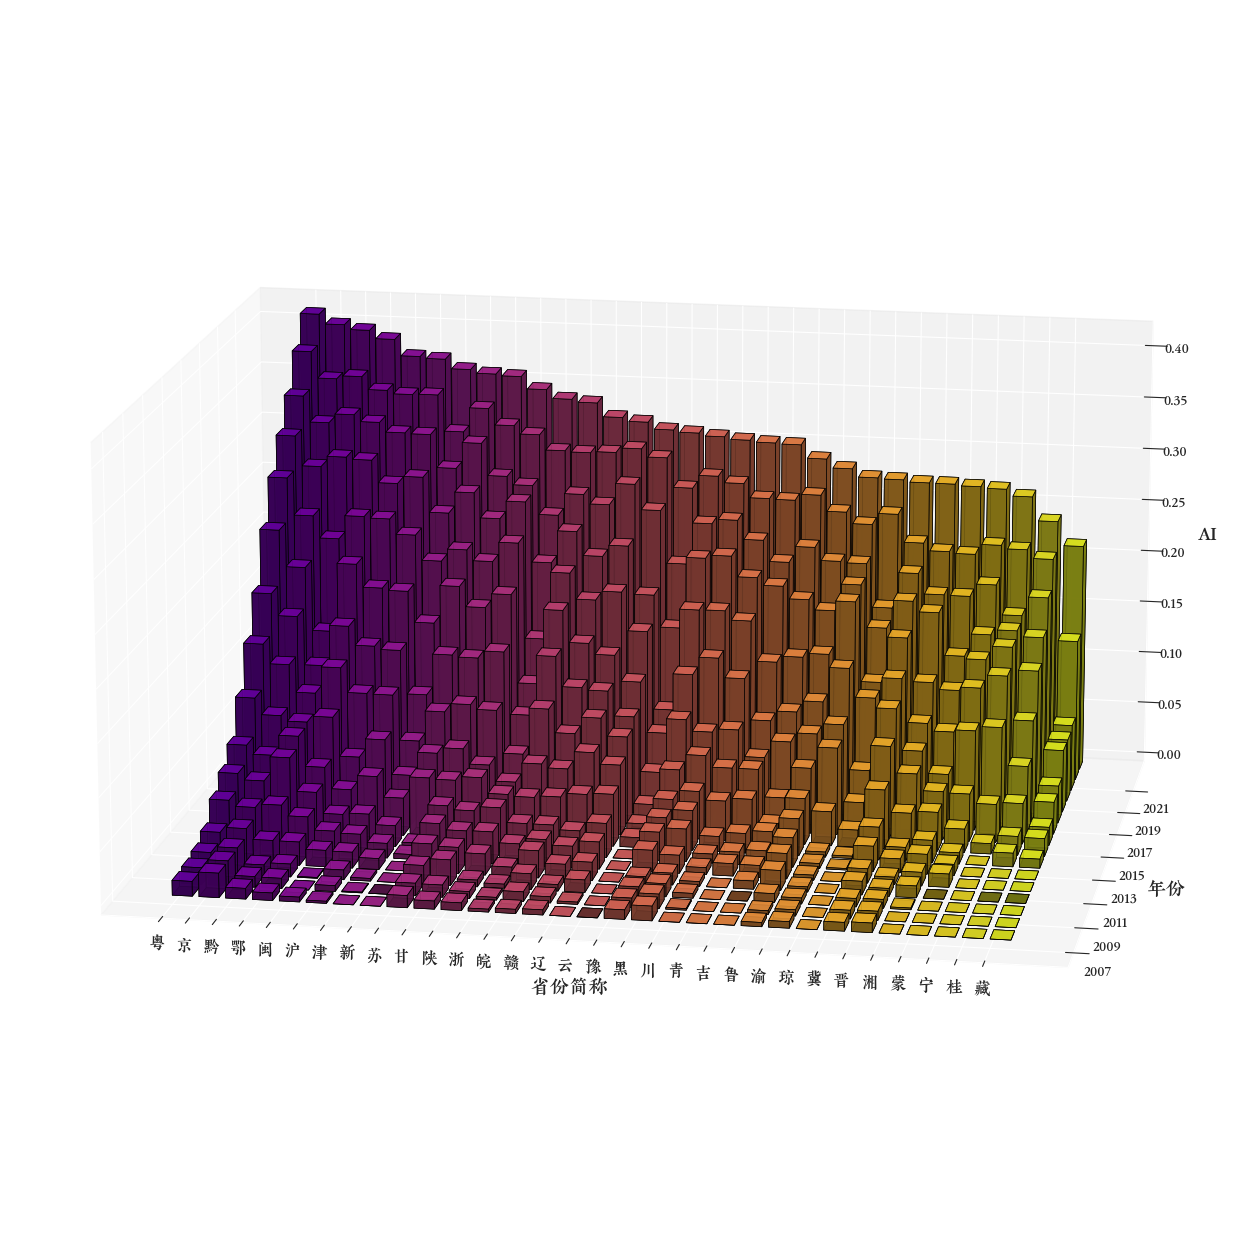

In [18]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from matplotlib.colors import LightSource
from matplotlib.ticker import FuncFormatter
from matplotlib.font_manager import FontProperties
font_path = 'C:/Users/25105/AppData/Local/Microsoft/Windows/Fonts/FZCuJinLJW.TTF'
# 轴标签
ax_font = FontProperties(fname=font_path, size=14)
# 刻度标签
tick_font1 = FontProperties(fname=font_path, size=10)
tick_font2 = FontProperties(fname=font_path, size=12)

def format_tick(val, pos):
    return f'{val:.2f}'

def plot_3dcol(df, TARGET, year, groupbycol):
    # 设置中文和负号显示
    # plt.rcParams['font.sans-serif'] = ['SimHei']
    # plt.rcParams['axes.unicode_minus'] = False

    # 计算每个省份和年份组合的TARGET值平均
    df_sum = df.groupby([groupbycol, year]).agg({TARGET: 'mean'}).reset_index()

    # 筛选2022年的数据，并根据TARGET值对省份进行排序
    year_2022 = df_sum[df_sum[year] == 2022].copy()
    year_2022_sorted = year_2022.sort_values(by=TARGET, ascending=False)
    sorted_provinces = year_2022_sorted[groupbycol].unique()

    # 更新省份位置映射，基于2022年的排序
    province_pos = {province: i for i, province in enumerate(sorted_provinces)}
    years = sorted(df_sum[year].unique())
    year_pos = {yr: j for j, yr in enumerate(years)}

    # 设置图形和3D轴
    fig = plt.figure(figsize=(24, 16))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_facecolor('white')  # 设置背景颜色为白色
    colors = plt.cm.plasma(np.linspace(0.2, 1, len(sorted_provinces)))

    # 绘制每个省份每个年份的柱状图
    for _, row in df_sum.iterrows():
        x = province_pos[row[groupbycol]]
        y = year_pos[row[year]]
        z = 0
        dx = 0.75
        dy = 0.75
        dz = row[TARGET]
        color = colors[x]  # 使用排序后的索引来选择颜色

        # 创建并调整光源对象
        ls = LightSource(azdeg=315, altdeg=45)
        ax.bar3d(x, y, z, dx, dy, dz, color=color, edgecolor='black', linewidth=0.5, alpha=0.9, lightsource=ls)

    # 设置坐标轴
    ax.set_xlabel(groupbycol, fontproperties=ax_font, labelpad=10)
    ax.set_ylabel(year, fontproperties=ax_font, labelpad=8)
    ax.set_zlabel(TARGET, fontproperties=ax_font, labelpad=7)
    
    # 设置刻度
    # ax.set_xticks(list(province_pos.values()))
    # ax.set_xticklabels(sorted_provinces, fontproperties=tick_font2)
    # ax.zaxis.set_major_formatter(FuncFormatter(format_tick))
    # displayed_years = [yr for i, yr in enumerate(years) if i % 2 == 0]  # 每隔两年显示一次
    # ax.set_yticks([year_pos[yr] for yr in displayed_years])
    # ax.set_yticklabels(displayed_years, fontproperties=tick_font1)
    # ax.set_zticklabels(ax.get_zticks(), fontproperties=tick_font1)
    
    ax.set_xticks(list(province_pos.values()))
    ax.set_xticklabels(sorted_provinces, fontproperties=tick_font2)
    displayed_years = [yr for i, yr in enumerate(years) if i % 2 == 0]  # 每隔两年显示一次
    ax.set_yticks([year_pos[yr] for yr in displayed_years])
    ax.set_yticklabels(displayed_years, fontproperties=tick_font1)
    # 设置z轴刻度格式和字体
    ax.zaxis.set_major_formatter(FuncFormatter(format_tick))
    for label in ax.zaxis.get_majorticklabels():
        label.set_fontproperties(tick_font1)
        
    ax.view_init(elev=15, azim=-80)  # 调整视角
    ax.set_box_aspect([2, 1.5, 1])  # 长宽高比例
    
    plt.savefig('E:/ggq的文件/比赛/24统计建模/paper/fig/3dcol.jpg', dpi=300, bbox_inches='tight')
    plt.show()

# 调用函数
plot_3dcol(df, 'AI', '年份', '省份简称')

C:\Users\25105\AppData\Local\Temp\ipykernel_23080\2455025081.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_zticklabels(ax.get_zticks(), fontproperties=tick_font1)


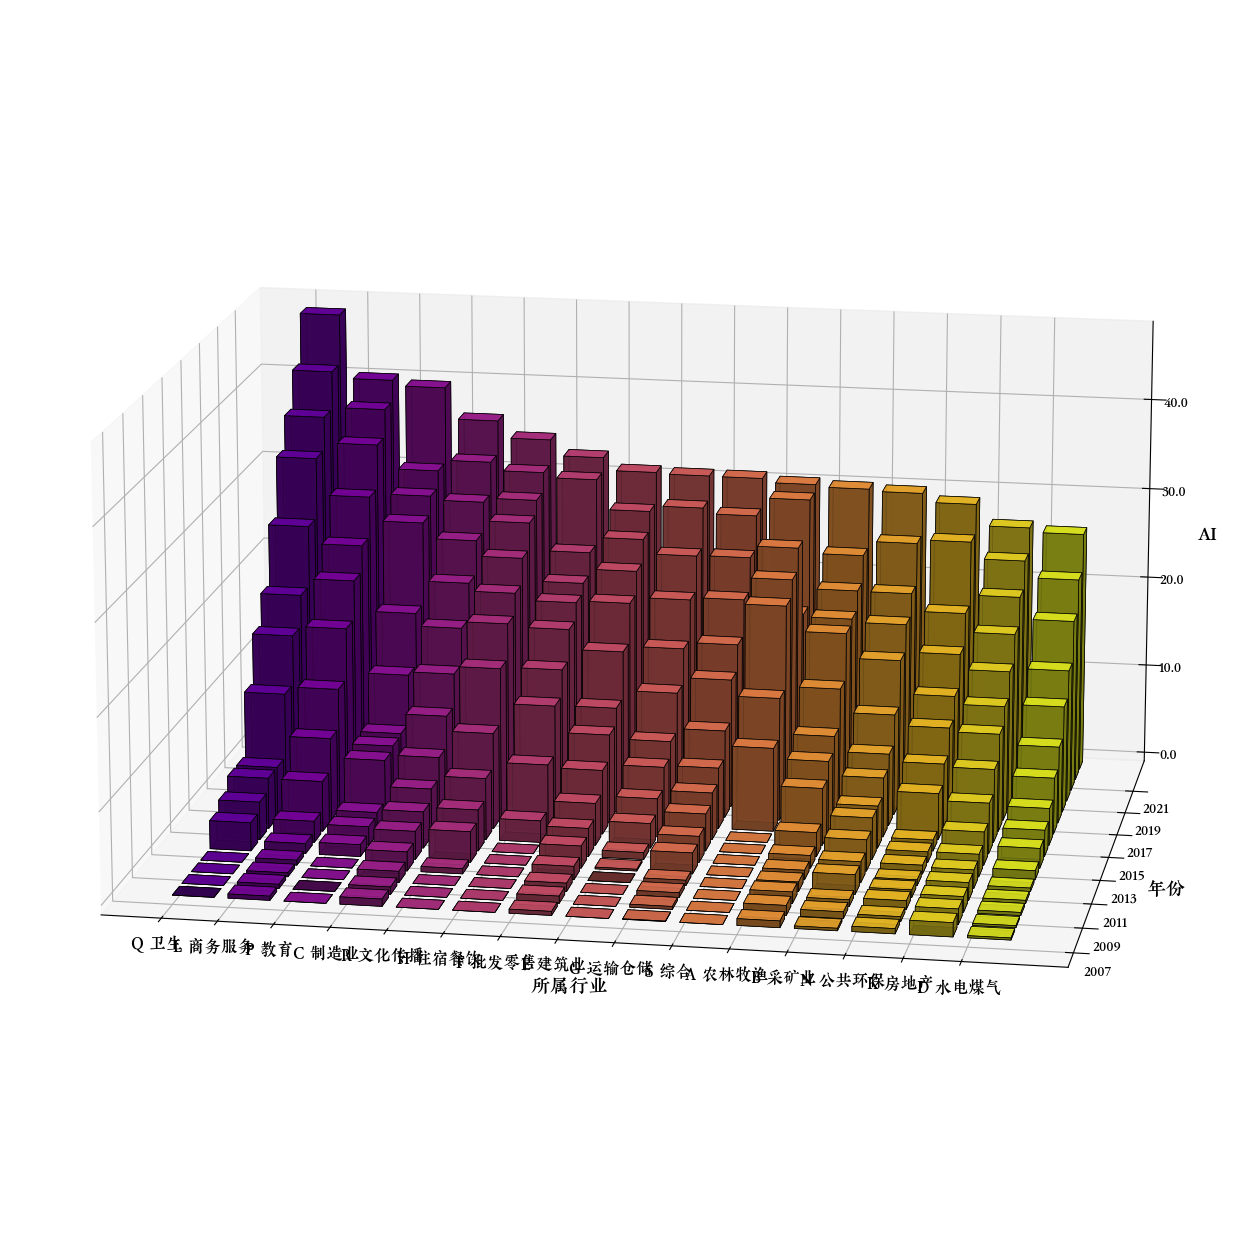

In [23]:
plot_3dcol(df, 'AI', '年份', '所属行业')

In [24]:
# 文件路径，根据实际情况替换
file_path = r'E:\ggq的文件\比赛\24统计建模\data\embedding_log_2022.txt'

# 初始化总时间
total_time = 0.0

# 打开并读取文件
with open(file_path, 'r', encoding='utf-8') as file:
    for line in file:
        # 检查行是否以"Completed"开头
        if line.startswith('Completed'):
            # 提取最后的秒数
            try:
                time_str = line.split()[-1]  # 获取最后一个元素，即时间字符串
                time_sec = float(time_str[:-1])  # 移除尾部的's'，并转换为浮点数
                total_time += time_sec  # 累加时间
            except ValueError:
                print("时间转换错误，跳过这一行：", line)

# 打印总时间
print("全程运行时间总和为：", total_time, "秒")

全程运行时间总和为： 78715.90999999992 秒


In [25]:
# 计算小时、分钟和秒
hours = int(total_time // 3600)
minutes = int((total_time % 3600) // 60)
seconds = total_time % 60

# 打印总时间，格式化为小时、分钟、秒
print(f"全程运行时间总和为：{hours}小时{minutes}分钟{seconds:.2f}秒")

全程运行时间总和为：21小时51分钟55.91秒
